In [11]:
from tensorflow.keras.models import load_model

# Load model from file
pen_to_pixel = load_model("pen_to_pixel.keras")
from tensorflow.keras import datasets, layers, models

In [12]:

import cv2
imgs = cv2.imread('/home/mudda/Downloads/88.jpeg')

In [13]:

if imgs is None:
    print("Image not found or failed to load!")
else:
    print("Image shape:", imgs.shape)

Image shape: (1280, 792, 3)


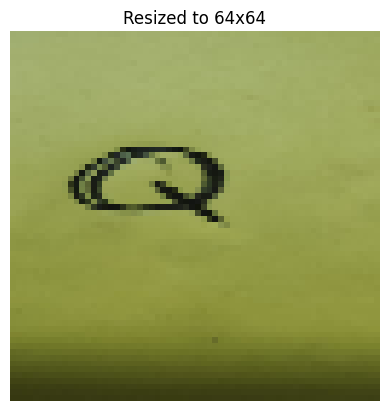

In [14]:
import cv2
import matplotlib.pyplot as plt

# Read image
imgs = cv2.imread('/home/mudda/Downloads/q.jpeg')

# Convert BGR -> RGB
img_rgb = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)

# Resize to 28x28
img_resized = cv2.resize(img_rgb, (64, 64))

# Show resized image
plt.imshow(img_resized, cmap='gray')
plt.title("Resized to 64x64")
plt.axis("off")
plt.show()

In [15]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load model
pen_to_pixel = load_model("pen_to_pixel.keras")

# Convert to grayscale
img_gray = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)

# ✅ Resize to 64x64 (not 28x28)
img_resized = cv2.resize(img_gray, (64, 64))

# Normalize (0–1 range)
img_normalized = img_resized / 255.0

# ✅ Add channel and batch dimensions → (1, 64, 64, 1)
img_ready = img_normalized.reshape(1, 64, 64, 1)

# Predict
pred = pen_to_pixel.predict(img_ready)
print("Predicted class:", pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
Predicted class: 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


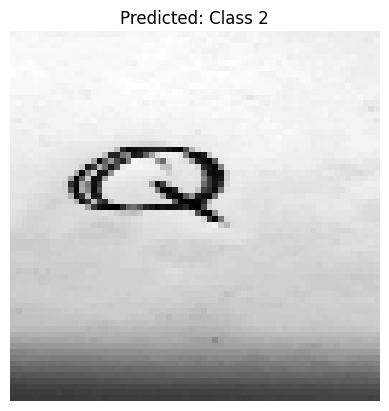

Predicted: Class 2


In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import string

# ============================
# Load your trained model
# (change file name if needed)
# ============================
model = tf.keras.models.load_model("pen_to_pixel.keras")

# ============================
# Label maps
# ============================
digit_map = {i: str(i) for i in range(10)}                       # 0–9 → "0"–"9"
letter_map = {i: c for i, c in enumerate(string.ascii_lowercase)} # 0–25 → "a"–"z"

# ============================
# Function to load & preprocess custom image
# ============================
def load_and_preprocess_image(img_path):
    image = tf.io.read_file(img_path)
    image = tf.image.decode_image(image, channels=1)   # grayscale
    image = tf.image.resize(image, [64,64])            # resize to training size
    image = tf.cast(image, tf.float32) / 255.0         # normalize
    image = tf.expand_dims(image, 0)                   # add batch dimension
    return image

# ============================
# Test with your image
# ============================
img_path = "/home/mudda/Downloads/q.jpeg"   # 🔹 change file path
image = load_and_preprocess_image(img_path)

# Predict
pred = model.predict(image)
pred_class = tf.argmax(pred, axis=1).numpy()[0]
num_classes = model.output_shape[-1]   # 10 for digits, 26 for letters

# Choose correct label set
if num_classes == 10:   # Digits model
    pred_label = digit_map[pred_class]
    label_type = f"Digit {pred_label}"
elif num_classes == 26:  # Letters model
    pred_label = letter_map[pred_class]
    label_type = f"Letter {pred_class+1} → {pred_label}"  # +1 to match EMNIST original (1–26)
else:
    pred_label = str(pred_class)
    label_type = f"Class {pred_label}"

# Show result
plt.imshow(tf.squeeze(image), cmap="gray")
plt.title(f"Predicted: {label_type}")
plt.axis("off")
plt.show()

print("Predicted:", label_type)


In [ ]:
import os
print(os.getcwd())

In [ ]:
from tensorflow.keras.utils import plot_model

# Save model architecture as an image
plot_model(pen_to_pixel, to_file="pen_to_pixel.png", show_shapes=True, show_layer_names=True)


In [ ]:
import matplotlib.pyplot as plt

# Assuming you trained with: history = model.fit(...)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


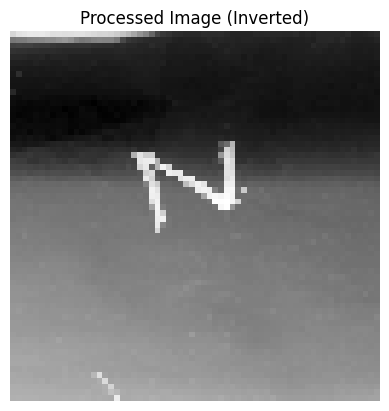

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
✅ Predicted class: I


In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ============================
# Load Model
# ============================
MODEL_PATH = "pen_to_pixel.keras"
model = tf.keras.models.load_model(MODEL_PATH)

# ============================
# EMNIST Labels
# ============================
emnist_labels = {
    "balanced": [
        "0","1","2","3","4","5","6","7","8","9",
        "A","B","C","D","E","F","G","H","I","J",
        "K","L","M","N","O","P","Q","R","S","T",
        "U","V","W","X","Y","Z",
        "a","b","d","e","f","g","h","n","q","r","t"
    ],
    "bymerge": [
        "0","1","2","3","4","5","6","7","8","9",
        "A","B","C","D","E","F","G","H","I","J",
        "K","L","M","N","O","P","Q","R","S","T",
        "U","V","W","X","Y","Z",
        "a","b","d","e","f","g","h","n","q","r","t"
    ],
    "byclass": (
        [str(i) for i in range(10)] +
        [chr(i) for i in range(ord("A"), ord("Z")+1)] +
        [chr(i) for i in range(ord("a"), ord("z")+1)]
    ),
    "digits": [str(i) for i in range(10)],
    "letters": [chr(i) for i in range(ord("a"), ord("z")+1)],
    "mnist": [str(i) for i in range(10)]
}

DATASET = "bymerge"   # change depending on training dataset
labels = emnist_labels[DATASET]

# ============================
# Load + Preprocess Image
# ============================
def load_and_prepare_image(path):
    img = tf.io.read_file(path)
    if path.lower().endswith(".jpg") or path.lower().endswith(".jpeg"):
        img = tf.image.decode_jpeg(img, channels=1)
    else:
        img = tf.image.decode_png(img, channels=1)

    # Resize to model input
    img = tf.image.resize(img, [64, 64])

    # Normalize [0,1]
    img = tf.cast(img, tf.float32) / 255.0

    # 🔹 Invert colors (make background black, text white)
    img = 1.0 - img  

    # Add batch dimension
    img = tf.expand_dims(img, axis=0)
    return img

# 🔹 Full path (with / at start!)
IMAGE_PATH = "/home/mudda/Downloads/n.jpeg"
img = load_and_prepare_image(IMAGE_PATH)

# Show the processed input image
plt.imshow(tf.squeeze(img), cmap="gray")
plt.title("Processed Image (Inverted)")
plt.axis("off")
plt.show()

# ============================
# Predict
# ============================
pred = model.predict(img)
pred_class = np.argmax(pred)
print(f"✅ Predicted class: {labels[pred_class]}")


2025-08-25 01:36:00.770304: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-25 01:36:00.806918: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-25 01:36:01.658825: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1756065962.913649  107041 gpu_device.cc:2020] Created device /job:localhost/rep

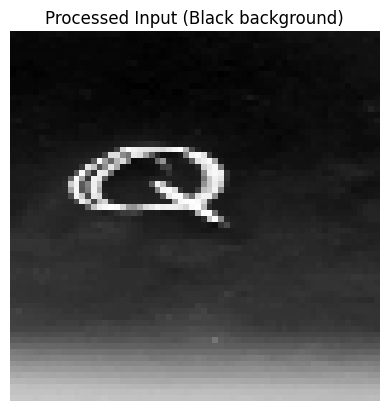

2025-08-25 01:36:03.905492: I external/local_xla/xla/service/service.cc:163] XLA service 0x71ffc4004b10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-25 01:36:03.905512: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-08-25 01:36:03.912083: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-25 01:36:03.966875: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
✅ Predicted class: 0


I0000 00:00:1756065965.071339  107125 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
MODEL_PATH = "pen_to_pixel.keras"
pen_to_pixel = tf.keras.models.load_model(MODEL_PATH)

# EMNIST labels (example for 'bymerge')
emnist_labels = [
    "0","1","2","3","4","5","6","7","8","9",
    "A","B","C","D","E","F","G","H","I","J",
    "K","L","M","N","O","P","Q","R","S","T",
    "U","V","W","X","Y","Z",
    "a","b","d","e","f","g","h","n","q","r","t"
]

# Path to your own image
IMAGE_PATH = "/home/mudda/Downloads/q.jpeg"

def load_and_prepare_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=1)   # force grayscale
    
    # Resize to 28x28 (EMNIST size)
    img = tf.image.resize(img, [64, 64])
    
    # Invert colors if background is white
    # (So background becomes black, letter white)
    img = 255 - img  
    
    # Normalize
    img = tf.cast(img, tf.float32) / 255.0
    
    # Add batch dimension
    img = tf.expand_dims(img, axis=0)
    return img

# Load and preprocess
img = load_and_prepare_image(IMAGE_PATH)

# Show processed image
plt.imshow(tf.squeeze(img), cmap="gray")
plt.title("Processed Input (Black background)")
plt.axis("off")
plt.show()

# Predict
pred = pen_to_pixel.predict(img)
pred_class = np.argmax(pred)
print(f"✅ Predicted class: {emnist_labels[pred_class]}")


2025-08-25 01:46:46.981047: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-08-25 01:46:47.040888: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-08-25 01:46:47.638421: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_151', 60 bytes spill stores, 60 bytes spill loads

2025-08-25 01:46:48.078309: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_158', 12 bytes spill stores, 12 bytes spill loads

2025-08-25 0

584/588 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9026 - loss: 0.2468

2025-08-25 01:46:56.654147: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_158', 44 bytes spill stores, 44 bytes spill loads

2025-08-25 01:46:57.581163: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 313.28MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-08-25 01:46:57.830012: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 306.12MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


588/588 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8991 - loss: 0.2642
✅ Test Accuracy: 89.91%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


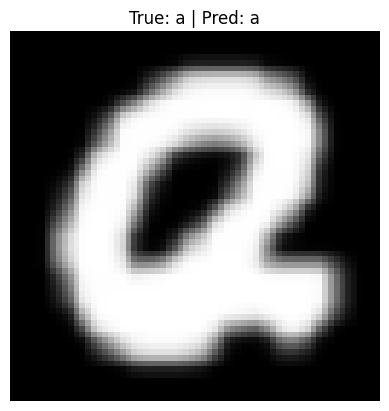

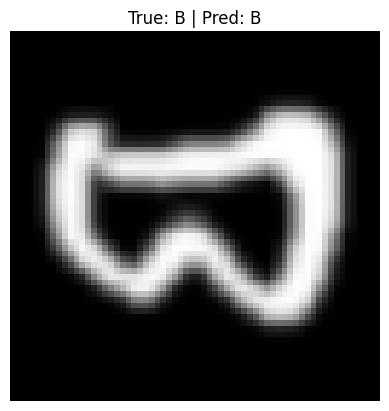

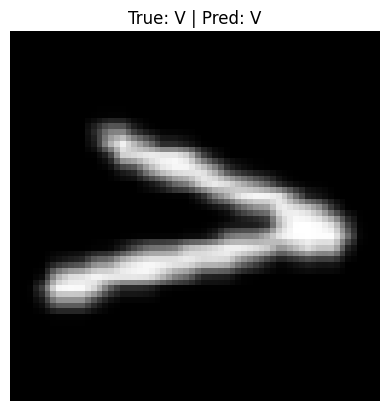

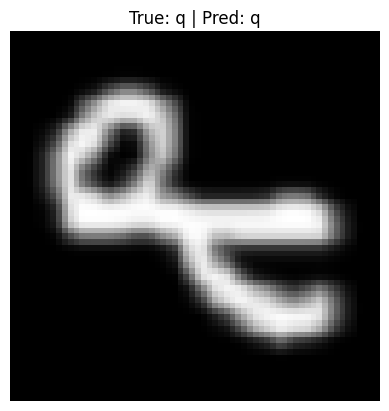

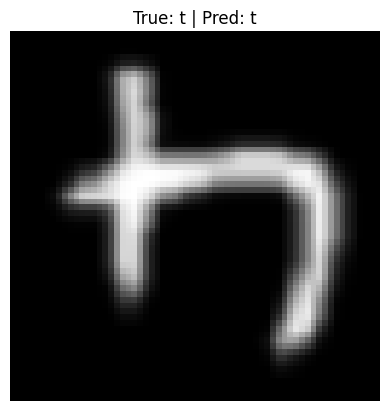

2025-08-25 01:46:58.939387: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# ============================
# Load model
# ============================
MODEL_PATH = "pen_to_pixel.keras"
model = tf.keras.models.load_model(MODEL_PATH)

# ============================
# EMNIST labels (Balanced as example)
# ============================
emnist_labels = [
    "0","1","2","3","4","5","6","7","8","9",
    "A","B","C","D","E","F","G","H","I","J",
    "K","L","M","N","O","P","Q","R","S","T",
    "U","V","W","X","Y","Z",
    "a","b","d","e","f","g","h","n","q","r","t"
]

# ============================
# Load EMNIST test dataset
# ============================
ds_test = tfds.load("emnist/balanced", split="test", as_supervised=True)

# Preprocessing function (must match training preprocessing!)
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0    # normalize
    image = tf.image.resize(image, [64, 64])      # resize to your model size
    return image, label

ds_test = ds_test.map(preprocess).batch(32)

# ============================
# Evaluate Accuracy
# ============================
loss, acc = model.evaluate(ds_test)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

# ============================
# Predict on few samples
# ============================
for images, labels in ds_test.take(1):   # take one batch
    preds = model.predict(images)
    pred_classes = np.argmax(preds, axis=1)

    for i in range(5):   # show 5 samples
        plt.imshow(tf.squeeze(images[i]), cmap="gray")
        plt.title(f"True: {emnist_labels[labels[i].numpy()]} | Pred: {emnist_labels[pred_classes[i]]}")
        plt.axis("off")
        plt.show()
